In [38]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [39]:
from google.colab import files

In [24]:
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [40]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "diabetes.csv" with length 23873 bytes


In [41]:
import io

In [42]:
pima = pd.read_csv(io.StringIO(uploaded['diabetes.csv'].decode('utf-8')))

In [43]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
X = pima[feature_cols]
y = pima.Outcome

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
gnb = GaussianNB()
gnb = gnb.fit(X_train,y_train)
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.7835497835497836


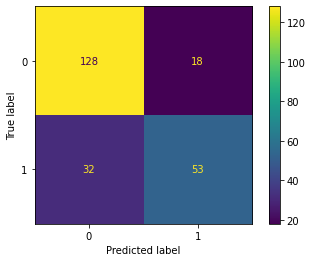

In [48]:
metrics.plot_confusion_matrix(gnb, X_test, y_test, values_format='d')

In [49]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

